In [21]:
#S-a efectuat un studiu despre starea domeniului Data Science, iar datele colectate sunt salvate in fisierul "data/surveyDataScience.csv".

#1.a. Sa se stabileasca:

#numarul de respondenti (de la care s-au colectate informatiile) x

#numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent 

#numarul de respondenti pentru care se detin date complete

#durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata), 

#durata medie a anilor de studii pentru respondentii din Romania si 
#durata medie a anilor de studii pentru respondentii din Romania care sunt femei. 

#Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. 
#Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.


#numarul de respondenti femei din Romania pentru care se detin date complete
#numarul de femei din Romania care programeaza in Python, 
#precum si intervalul de varsta cu cele mai multe femei care programeaza in Python? 
#Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.
#domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). 
#In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
#transformati informatiile despre vechimea in programare in numar de ani 
#(folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 
#pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). 
#Ce se poate spune despre aceasta variabila?

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


def pb1a():
    data = pd.read_csv("data/surveyDataSience.csv", delimiter=',', header=[0,1],low_memory=False)
    #print(date)
    data.columns = data.columns.get_level_values(0)
    data = data[1:].reset_index(drop=True)
    #numarul de respondenti (de la care s-au colectate informatiile)
    respondents = data.shape[0]
    print("Numarul de respondenti ", respondents, "\n")

    #numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent
    properties = data.shape[1]
    print("Numarul de proprietati: ", properties)
    print("Tipul informatiilor: \n", data.iloc[0].apply(type))

    #numarul de respondenti pentru care se detin date complete
    full_respondents = data.dropna().shape[0]
    print("\nNumarul de respondenti pentru care se detin date complete: ", full_respondents, "\n")

    #durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata)
    education_years = {
        "Bachelor’s degree": 3,
        "Master’s degree": 5,
        "Doctoral degree": 8,
        "Professional doctorate": 8,
        "Some college/university study without earning a bachelor’s degree": 0,
        "I prefer not to answer": 0,
        "No formal education past high school": 0
    }

    data['ani_studiu'] = data['Q4'].map(education_years)
    medie = data['ani_studiu'].mean()
    print("Durata medie a studiilor pentru toti respondentii:", medie)

    #durata medie a anilor de studii pentru respondentii din Romania
    romania_data = data[data['Q3'] == 'Romania']
    medie_romania = romania_data['ani_studiu'].mean()
    print("Durata medie a studiilor pentru respondenții din Romania:", medie_romania)

    #durata medie a anilor de studii pentru respondentii din Romania care sunt femei
    romania_femei = romania_data[romania_data['Q2'] == 'Woman']
    medie_romania_femei = romania_femei['ani_studiu'].mean()
    print("Durata medie a studiilor pentru femeile din Romania:", medie_romania_femei)

    #numarul de respondenti femei din Romania pentru care se detin date complete
    data_complete = data.dropna()
    females_romania = data_complete[(data_complete['Q2'] == 'Woman') & (data_complete['Q3'] == 'Romania')]

    num_females_romania = females_romania.shape[0]
    print("Numarul de femei din Romania pentru care se detin date complete: ", num_females_romania)

    python_programmers = data[(data['Q2'] == 'Woman') & (data['Q3'] == 'Romania') & (data['Q7_Part_1'] == 'Python')]
    num_python_females = python_programmers.shape[0]
    print("Numarul de femei din Romania care programeaza in Python: ", num_python_females)
    
    age_groups_python = python_programmers['Q1'].value_counts()
    most_common_age_group_python = age_groups_python.idxmax()
    print("Intervalul de varsta cu cele mai multe femei care programeaza in Python: ", most_common_age_group_python)

    cpp_programmers = data[(data['Q2'] == 'Woman') & (data['Q3'] == 'Romania') & (data['Q7_Part_5'] == 'C++')]
    num_cpp_females = cpp_programmers.shape[0]
    print("Numarul de femei din România care programează în C++: ", num_cpp_females)

    age_groups_cpp = cpp_programmers['Q1'].value_counts()
    most_common_age_group_cpp = age_groups_cpp.idxmax()
    print("Intervalul de varsta cu cele mai multe femei care programeaza in C++: ",most_common_age_group_cpp)

    print("\nAnaliza proprietatilor:")
    for col in data.columns:
        unique_vals = data[col].dropna().unique()
        num_unique = len(unique_vals)

        if num_unique == 0:
            print(f"- {col}: 1 optiune posibila (ex : None)")
        elif num_unique == 1:
            print(f"- {col}: 1 opțiune posibila (ex: {unique_vals[0]})")
        else:
            if data[col].dtype == 'object':
                print(f"- {col}: {num_unique} raspunsuri distincte")
            else:
                print(f"- {col}: Min={data[col].min()}, Max={data[col].max()}")

    experience_map = {
        '< 1 years': 0,
        '1-3 years': 2,
        '3-5 years': 4,
        '5-10 years': 7.5,
        '10-20 years': 15,
        '20+ years': 20,
    }
    data['Q6_numeric'] = data['Q6'].map(experience_map)
    stats = data['Q6_numeric'].describe()
    print("\nStatistici vechime programare:")
    print(f"Min: {stats['min']:.2f}, Max: {stats['max']:.2f}, Media: {stats['mean']:.2f}, Std: {stats['std']:.2f}, Mediana: {stats['50%']:.2f}")
pb1a()

Numarul de respondenti  25972 

Numarul de proprietati:  369
Tipul informatiilor: 
 Time from Start to Finish (seconds)      <class 'numpy.int64'>
Q1                                               <class 'str'>
Q2                                               <class 'str'>
Q3                                               <class 'str'>
Q4                                               <class 'str'>
                                                ...           
Q38_B_Part_8                                   <class 'float'>
Q38_B_Part_9                                   <class 'float'>
Q38_B_Part_10                                  <class 'float'>
Q38_B_Part_11                          <class 'numpy.float64'>
Q38_B_OTHER                                    <class 'float'>
Name: 0, Length: 369, dtype: object

Numarul de respondenti pentru care se detin date complete:  0 

Durata medie a studiilor pentru toti respondentii: 4.066610195595256
Durata medie a studiilor pentru respondenții din Roma

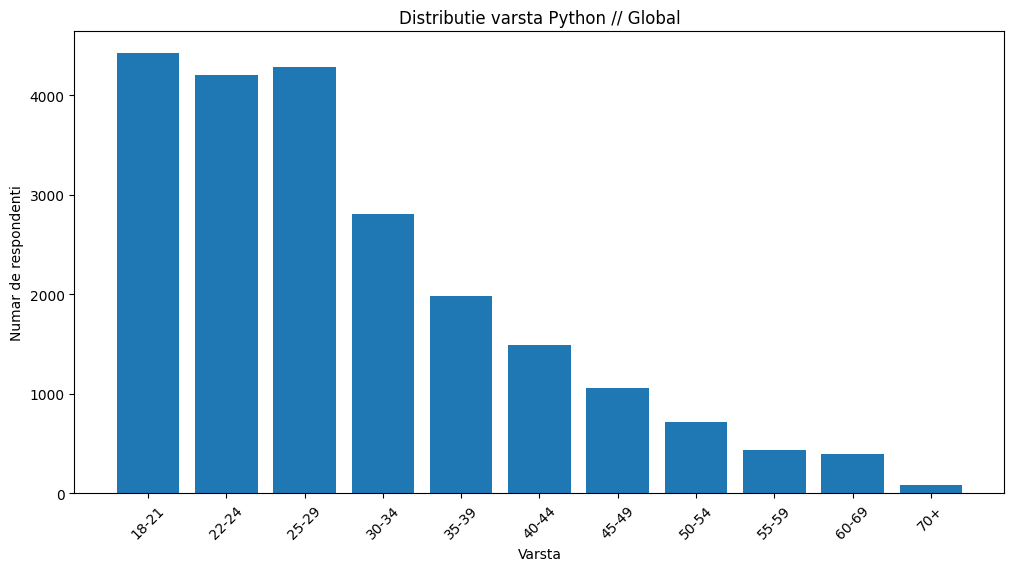

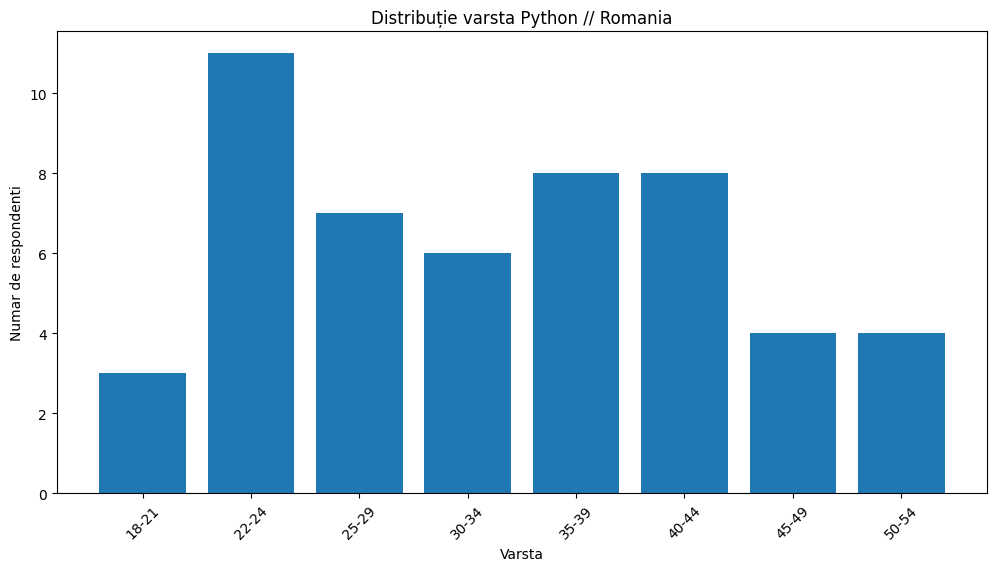

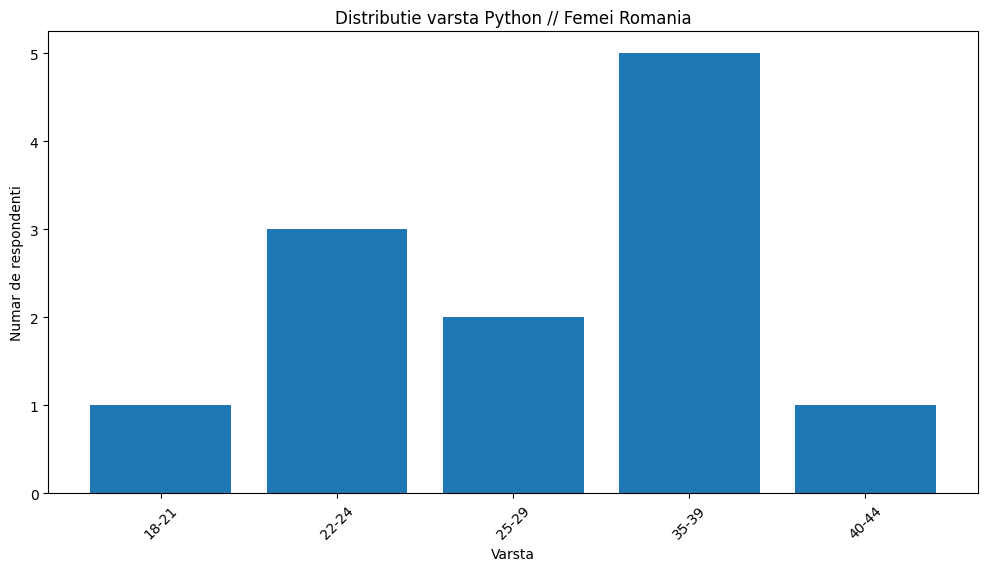

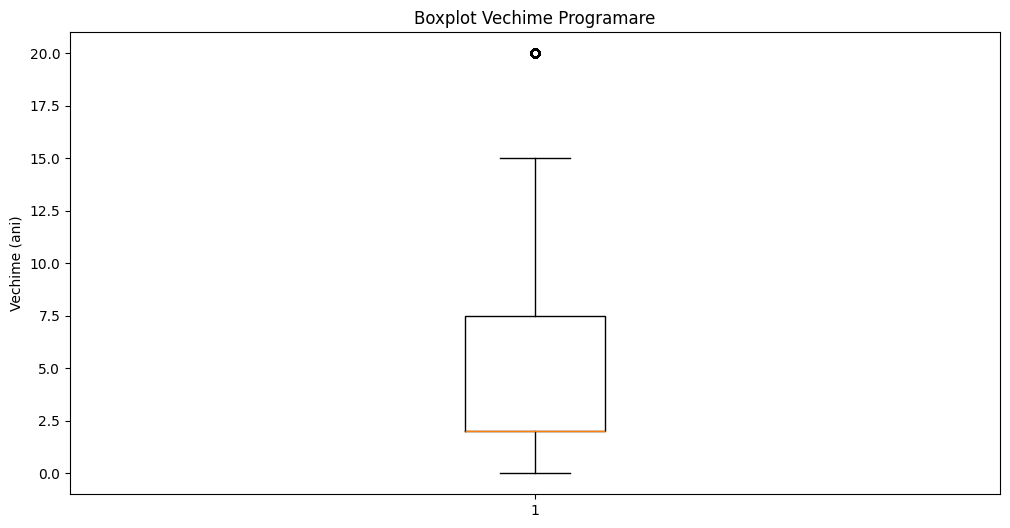

In [23]:
def pb1b():
    data = pd.read_csv("data/surveyDataSience.csv", delimiter=',', header=[0,1], low_memory=False)
    data.columns = data.columns.get_level_values(0)
    data = data[1:].reset_index(drop=True)

    # distributia respondentilor care programeaza in Python pe categorii de varsta
    python_users = data[data['Q7_Part_1'] == 'Python']
    age_counts_python = python_users['Q1'].value_counts().sort_index()
    plt.figure(figsize=(12,6))
    plt.bar(age_counts_python.index, age_counts_python.values)
    plt.title('Distributie varsta Python // Global')
    plt.xlabel('Varsta')
    plt.ylabel('Numar de respondenti')
    plt.xticks(rotation=45)
    plt.show()

    # distributia respondentilor din Romania care programeaza in Python pe categorii de varsta
    ro_python = python_users[python_users['Q3'] == 'Romania']
    age_counts_ro_python = ro_python['Q1'].value_counts().sort_index()
    plt.figure(figsize=(12,6))
    plt.bar(age_counts_ro_python.index, age_counts_ro_python.values)
    plt.title('Distribuție varsta Python // Romania')
    plt.xlabel('Varsta')
    plt.ylabel('Numar de respondenti')
    plt.xticks(rotation=45)
    plt.show()

    # distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta
    ro_femei_python = ro_python[ro_python['Q2'] == 'Woman']
    age_counts_ro_femei_python = ro_femei_python['Q1'].value_counts().sort_index()
    plt.figure(figsize=(12,6))
    plt.bar(age_counts_ro_femei_python.index, age_counts_ro_femei_python.values)
    plt.title('Distributie varsta Python // Femei Romania')
    plt.xlabel('Varsta')
    plt.ylabel('Numar de respondenti')
    plt.xticks(rotation=45)
    plt.show()

    # respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)
    experience_map = {
        '< 1 years': 0,
        '1-3 years': 2,
        '3-5 years': 4,
        '5-10 years': 7.5,
        '10-20 years': 15,
        '20+ years': 20,
    }
    data['Q6_numeric'] = data['Q6'].map(experience_map)
    plt.figure(figsize=(12,6))
    plt.boxplot(data['Q6_numeric'].dropna())
    plt.title('Boxplot Vechime Programare')
    plt.ylabel('Vechime (ani)')
    plt.show()
pb1b()